#### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling

In [3]:
dataset = pd.read_csv('../data/dados_imercao.csv')
dataset.head(2)

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1465 non-null   object
 1   product_name   1465 non-null   object
 2   category       1465 non-null   object
 3   actual_price   1465 non-null   object
 4   product_price  1465 non-null   object
 5   rating         1465 non-null   object
 6   rating_count   1465 non-null   int64 
 7   about_product  1465 non-null   object
 8   product_link   1465 non-null   object
dtypes: int64(1), object(8)
memory usage: 103.1+ KB


In [5]:
dataset.describe()

,rating_count
count,1.465000e+03
mean,2.166947e+04
std,9.132905e+04
min,0.000000e+00
25%,9.100000e+02
50%,4.003000e+03
75%,1.466700e+04
max,2.051952e+06


#### Limpando dados

In [6]:
# replace string
dataset['actual_price'] = dataset['actual_price'].str.replace('₹', '')
dataset['actual_price'] = dataset['actual_price'].str.replace('.', '')
dataset['actual_price'] = dataset['actual_price'].str.replace(',', '.')

# short form
dataset['product_price'] = dataset['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')

dataset['rating'] = dataset['rating'].str.replace(',', '.')

C:\Users\Ewerton\AppData\Local\Temp\ipykernel_9976\967695945.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['actual_price'] = dataset['actual_price'].str.replace('.', '')
C:\Users\Ewerton\AppData\Local\Temp\ipykernel_9976\967695945.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['product_price'] = dataset['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


In [7]:
#convertendo para valor numérico
dataset['actual_price'] = pd.to_numeric(dataset['actual_price'])
dataset['product_price'] = pd.to_numeric(dataset['product_price'])
dataset['rating'] = pd.to_numeric(dataset['rating'])
dataset.head(2)

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.5,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.0,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1465 non-null   object 
 1   product_name   1465 non-null   object 
 2   category       1465 non-null   object 
 3   actual_price   1465 non-null   float64
 4   product_price  1465 non-null   float64
 5   rating         1465 non-null   float64
 6   rating_count   1465 non-null   int64  
 7   about_product  1465 non-null   object 
 8   product_link   1465 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 103.1+ KB


In [9]:
dataset.describe()

,actual_price,product_price,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1.465000e+03
mean,3077.617693,5365.248840,4.432198,2.166947e+04
std,6860.277463,10743.796284,0.226138,9.132905e+04
min,2.500000,38.000000,0.000000,0.000000e+00
25%,314.000000,800.000000,4.490000,9.100000e+02
50%,799.000000,1645.000000,4.500000,4.003000e+03
75%,1999.000000,4199.000000,4.510000,1.466700e+04
max,77990.000000,139900.000000,5.000000,2.051952e+06


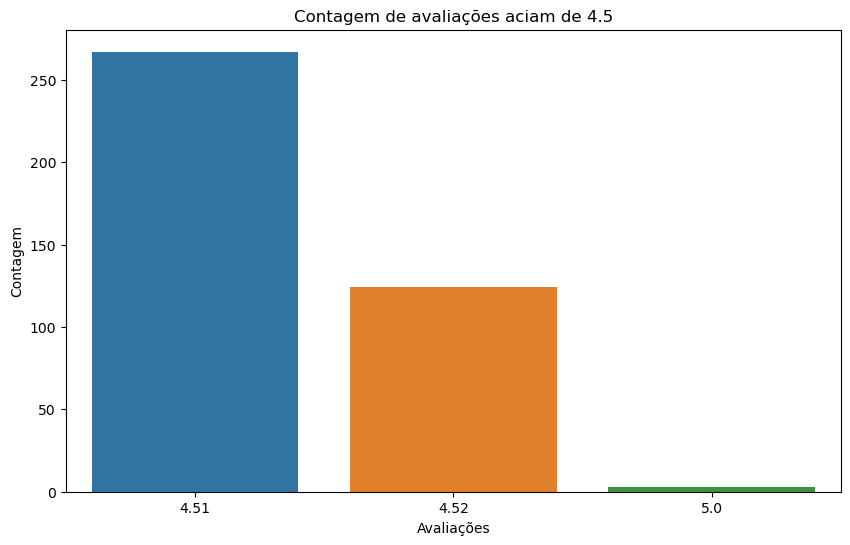

In [10]:
ratings_above_4_5 = dataset[dataset['rating'] > 4.5]
ratings_counts = ratings_above_4_5['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values)
plt.title('Contagem de avaliações aciam de 4.5')
plt.xlabel('Avaliações')
plt.ylabel('Contagem')
plt.show()

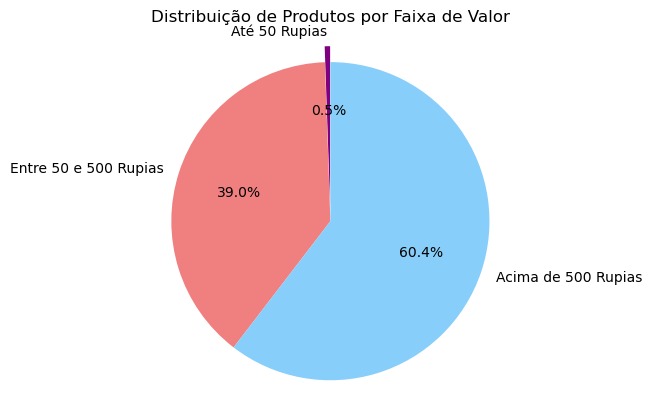

In [11]:
# Filtrar os produtos em três grupos
valores_ate_50 = dataset[dataset['actual_price'] <= 50]
valores_entre_50_e_500 = dataset[(dataset['actual_price'] > 50) & (dataset['actual_price'] <= 500)]
valores_acima_de_500 = dataset[dataset['actual_price'] > 500]

# Contar o número de produtos em cada grupo
contagem_ate_50 = valores_ate_50.shape[0]
contagem_entre_50_e_500 = len(valores_entre_50_e_500)
contagem_acima_de_500 = valores_acima_de_500.shape[0]

# Preparar os dados para o gráfico de pizza
contagem = [contagem_ate_50, contagem_entre_50_e_500, contagem_acima_de_500]
faixas = ['Até 50 Rupias', 'Entre 50 e 500 Rupias', 'Acima de 500 Rupias']
destacar = (0.1, 0, 0)  # Destacar a primeira fatia (maior valor)

cores = ['purple', 'lightcoral', 'lightskyblue']

# Criar um gráfico de pizza
plt.pie(contagem, labels=faixas, explode=destacar, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title('Distribuição de Produtos por Faixa de Valor')
# Mostrar o gráfico
plt.axis('equal')  # Mantém o gráfico de pizza circular
plt.show()

In [13]:
# dataset.profile_report()